# Using k Means

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans


In [2]:
# load in data from seaborn dataset iris
iris = sns.load_dataset('iris')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
# wrangle the data - drop species column b/c not needed. could recode if it were needed.
irisTrimmed = iris.drop('species', axis=1)

In [5]:
irisTrimmed

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
# perform k Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(irisTrimmed)

KMeans(n_clusters=2)

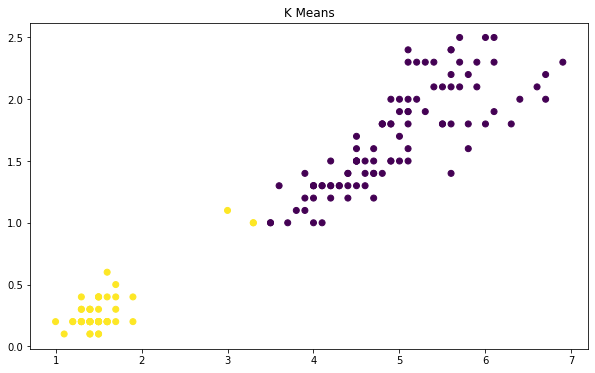

In [7]:
# utilize the k-means: plot
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(irisTrimmed['petal_length'], irisTrimmed['petal_width'], c=kmeans.labels_, cmap='viridis')

In [8]:
# get the data back into a usable form
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
# add this data back into the dF
irisTrimmed['Group'] = kmeans.labels_

In [12]:
# can investigate means by category:
irisTrimmed.groupby('Group')['petal_length'].mean()

Group
0    4.958763
1    1.560377
Name: petal_length, dtype: float64

In [13]:
irisTrimmed.groupby('Group')['petal_width'].mean()

Group
0    1.695876
1    0.290566
Name: petal_width, dtype: float64

In [10]:
# find the centroid
kmeans.cluster_centers_

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36981132, 1.56037736, 0.29056604]])

In [11]:
# find the total distance of every point from its cluster center
kmeans.inertia_

152.3479517603579